## Observations and Insights 
•Observation One: Capomulin and Ramicane had the lowest SEMs, standard deviations, and average tumor size. By having these stats, Ramicane and Capomulin are likely the most effective drug regimens. 

•Observation Two: Propriva had the fewest total number of mice across all timepoints, indicating some ineffectiveness with this treatment since mice were dying off sooner versus other treatments. 

•Observation Three: There is a strong correlation between mouse weight and average tumor size on the drug regimen capomulin; correlation coefficient is .84. 

General notes: There was a lot of confusion about whether or not to remove all of the mouse that had duplicates or
simply just the duplicates. I originally only removed the duplicates but soon had a change of heart. I ultimately removed the entire mouse ID from the data because it felt tainted. In a real world situation I would try to get at the heart of the issue but since we are in a homework vacuum, that was not the case. 

On a second note, I felt the barchart was more appealing in alphabetical order. I understand the sort from highest to lowest and seeing the drugs in descending order, but alphabetical order gives the same effect highlighting which is worst/best, and is sorted in a second way. For more details, I have commented in my code blocks. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#The two datasets share 'Mouse ID' so I am going to merge the sets on that column.
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Check for Duplicate mice and clean the Dataframe
Checking the number of mice in the DataFrame.

In [3]:
#This will quickly show me how many unique Mouse IDs there are. 
merged_df['Mouse ID'].nunique()

249

In [4]:
# Checking the number of mice in the DataFrame.
# If we compare to a .nunique (like above) for Mouse ID we find that there are 249 unique mice IDs, but
# 250 show up if we do a value_counts. So there appears to be a discrepancy from at least the 0 timepoint on.
merged_df['Mouse ID'].value_counts()
merged_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# I need to find the ONE duplicate mouse. There is a function that can search what is duplicated that I will use:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using
#-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
findthedup_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
findthedup_df
#This is showing that mouse g989 has duplicated rows up to the 20 timepoint(so 5 actual duplicates).

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# now I need to drop all of g989 since it has duplicates. The wording is vague but I am dropping it all
# we can also confirm they have been dropped by checking the row length; it decreased from 1893 to 1880. 
#clean_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
#clean_df
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# re-checking the number of mice in the DataFrame at their time points.
clean_df['Mouse ID'].value_counts()
clean_df['Timepoint'].value_counts()

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

In [8]:
# Checking the number of mice in the clean DataFrame part 2:
# I want to show, again, that the mouse at g989 is not there. A .loc equaling the mouse ID
# should suffice. 
#This will show that the mouse we found to be a duplicate has been removed entirely.
double_clean_df = clean_df.loc[clean_df['Mouse ID']=='g989'].count()
double_clean_df

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [9]:
#Look at possibly doing a groupby for each unique mouse by their ID, this will allow me to 
#see their timepoints. This is more for my clarity to see a different style of set up and is entirely preference. 
groupbyID_df = clean_df.groupby(['Mouse ID','Timepoint'])
groupbyID_df.first()

Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                
a203     0            Infubinol  Female          20          23   
         5            Infubinol  Female          20          23   
         10           Infubinol  Female          20          23   
         15           Infubinol  Female          20          23   
         20           Infubinol  Female          20          23   
...                         ...     ...         ...         ...   
z969     25            Naftisol    Male           9          30   
         30            Naftisol    Male           9          30   
         35            Naftisol    Male           9          30   
         40            Naftisol    Male           9          30   
         45            Naftisol    Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                   45.000000                 0  
         5                   48.508468                 0  
         10                  51.852437                 1  
         15                  52.777870                 1  
         20                  55.173336                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1880 rows x 6 columns]

## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [10]:
# here I want to do a groupby with a .agg, I think that will be the easiest to code as opposed to 
# creating a bunch of variables for the summary stats by regimen and assigning them to a dictionary. 
# I used this as an aid for my .agg: 
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
stats_sum_df = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
stats_sum_df.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

# Bar Plot
1) Generate a bar plot showing the number of mice per time point for 
each treatment throughout the course of the study using pandas.

2) Generate a bar plot showing the number of mice per time point 
for each treatment throughout the course of the study using pyplot. 

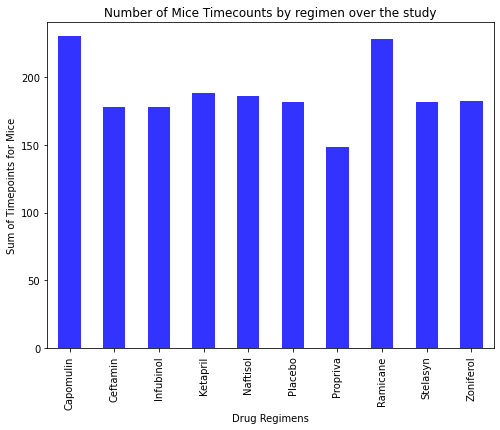

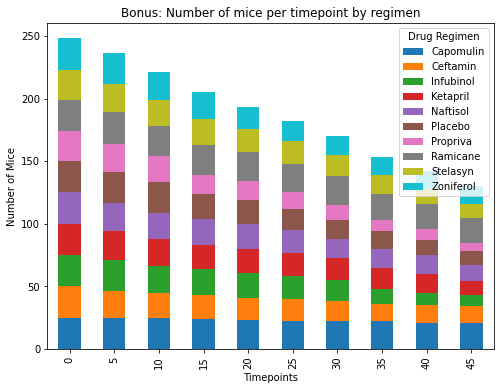

In [11]:
#Bar plot using Pandas:
# I want to do a groupby for regimen, then Mouse ID. This should show me mouse per regimen pretty simply. 
xgroup = clean_df.groupby('Drug Regimen')
ygroup = xgroup['Mouse ID'].count()
#Plot figure size and barchart...with some formatting and labels.
plt.figure(figsize=(8,6))
barchart = ygroup.plot(kind="bar", title="Number of Mice Timecounts by regimen over the study", stacked=True,\
                      facecolor='blue',alpha=.8, width = .5)
# Limits
plt.xlim=(-0.25,len(xgroup))
plt.ylim(0, max(ygroup) + 10)
# Labels
barchart.set_xlabel("Drug Regimens")
barchart.set_ylabel("Sum of Timepoints for Mice")

# Bonus Second Graph:
# This represents each regimens' mice count over each timepoint. I originally thought, due to some vague wording,
# that we needed to represent the number of mice each regimen had over the timepoints. I liked how this turned
# out, and think it is informitive, so I kept it as a bonus graph. 
#https://stackoverflow.com/questions/26683654/making-a-stacked-barchart-in-pandas
aliveovertimegroup = clean_df.groupby(['Timepoint','Drug Regimen'])['Mouse ID'].count().unstack()\
    .plot(kind='bar', stacked=True, figsize = (8,6), title = "Bonus: Number of mice per timepoint by regimen")
#Labels
aliveovertimegroup.set_ylabel("Number of Mice")
aliveovertimegroup.set_xlabel("Timepoints")
plt.show()

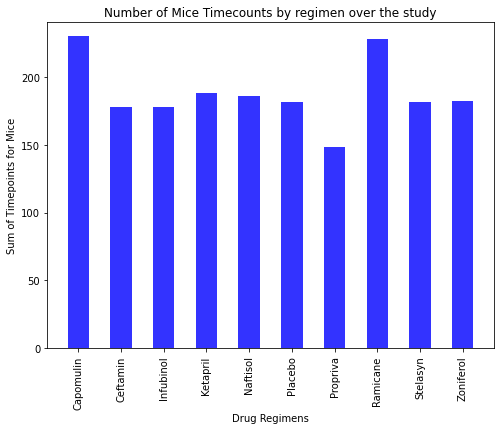

In [17]:
# Bar plot using Pyplot:
# I will want to set a new variable to the cleaned DF and find the unique values for drug regimen. 
regimen_count = clean_df["Drug Regimen"].unique()
sort_regimen = regimen_count.sort()
x_axis = np.arange(0,len(regimen_count))
tick_locations = [i for i in x_axis]
#Plot the figure size, barchart, and some formatting/styling to make it identical to the bar graph above
plt.figure(figsize=(8,6))
plt.bar(regimen_count, ygroup,alpha=0.8,color='blue',align='center',width=.5)
plt.xticks(tick_locations,regimen_count, rotation='vertical')
#limits
plt.xlim=(-0.25,len(x_axis))
plt.ylim(0, max(ygroup) + 10)
# Labels and title
plt.title("Number of Mice Timecounts by regimen over the study")
plt.ylabel("Sum of Timepoints for Mice")
plt.xlabel("Drug Regimens")
plt.show()

## Pie Plots
1) Generate a pie plot showing the distribution of female versus male mice using pandas

2) Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


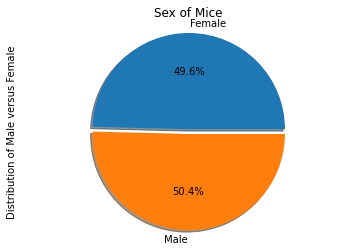

<Figure size 432x288 with 0 Axes>

In [18]:
#Pie plot: Pandas
# Collect the sex breakdown of the mice
s_group = clean_df['Mouse ID'].groupby([clean_df['Sex']]).nunique()
print(s_group)

# Place the keys for sex
s_list = s_group.keys()
explode = [0.05,0]

# Create a pie chart based upon sex breakdown
s_pie = s_group.plot(kind="pie", y=s_list, title= "Sex of Mice",autopct='%2.1f%%',\
                       explode = explode, shadow=True)
s_pie.set_ylabel("Distribution of Male versus Female")
#show plot
plt.axis('equal')
plt.show()
plt.tight_layout()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


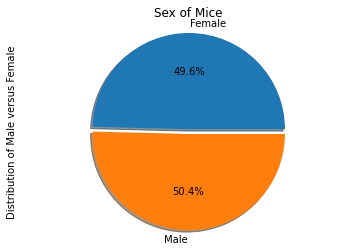

In [19]:
#Pie plot: Pyplot
#This pie chart needs to look identical to the pie chart above so I will use the same colors and formatting. 
#https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups/38309807
print(s_group)
explode = [0.05,0]
labels = ['Female','Male']
plt.pie(s_group, explode=explode, labels=labels, autopct='%2.1f%%',startangle=0,shadow=True)
plt.axis('equal')
plt.title("Sex of Mice")
plt.ylabel("Distribution of Male versus Female")
plt.show()


## Quartiles, Outliers and Boxplots
1) Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
Calculate the IQR and quantitatively determine if there are any potential outliers. 

2) Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  
#Find the last column of each Mouse ID
final_tumor = clean_df.groupby('Mouse ID').agg(['last']).stack()
#Now I need to locate where the drug equals the four most promising: Capomulin, Ramicane, Infubinol, and Ceftamin
# I am going to assign this list to a new variable. I want to do a .loc and build one DF containing the four promising treatments. 
regimen_df = final_tumor.loc[(final_tumor['Drug Regimen'] == 'Capomulin')\
                                | (final_tumor['Drug Regimen'] == 'Ramicane')\
                             | (final_tumor['Drug Regimen'] == 'Infubinol')\
                             | (final_tumor['Drug Regimen'] == 'Ceftamin')]
#drop the columns not associated with Mouse ID, Regimen, and Tumor Volume
cleanregimen_df = regimen_df.drop(regimen_df.columns[[1,2,3,4,6]], axis=1)
#Create individual dataframes for each regimen. This is a bit tedious but I'd like to call from individual DFs. 
capomulin_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Capomulin']
ramicane_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Ramicane']
infubinol_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Infubinol']
ceftamin_df = cleanregimen_df.loc[cleanregimen_df['Drug Regimen']== 'Ceftamin']

In [30]:
# try and do a function for all the print statements since they are all based on four drugs. 
# This will be tricky since I need to find the tumor volume by the four promising regimen and all the IQR data 
# within the function. 
# I also used the Python Crash Course PDF on Functions here. 
# Create my function
def iqrstats(regimen):
    #Stats will call from my variable above and then look for what ever argument I establish in ()
    stats_df = regimen_df.loc[(regimen_df['Drug Regimen']==regimen)]
    size = stats_df['Tumor Volume (mm3)']
    #Set this up just like the IQR class activity.
    quartiles = size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    inner = upperq - lowerq
    lower_bound = lowerq - (1.5*inner)
    upper_bound = upperq + (1.5*inner)
    #print statements based upon variables above. This will also look like the class activity
    print(f'\033[1m - {regimen} summary:\n\033[0m') #just jazzing up the titles of each regimen
    print(f"the lower quartile is: {round((lowerq),2)}")
    print(f"the upper quartile is: {round((upperq),2)}")
    print(f"The inner quartile is: {round((inner),2)}")
    print(f"The median is: {round((quartiles[.5]),2)}")
    print(f"Values below {round((lower_bound),2)} could be potential outliers.")
    print(f"Values above {round((upper_bound),2)} could be potential outliers.\n")

#calculate te final tumor volume = final_tumor then locate the drugs = regimen_df
sorted_tumors = regimen_df.sort_values(by=["Tumor Volume (mm3)"])
fourregimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#for loop through the four regimens with the stats function up above. 
for i in (fourregimen):
    iqrstats(i)

 - Capomulin summary:

the lower quartile is: 32.38
the upper quartile is: 40.16
The inner quartile is: 7.78
The median is: 38.13
Values below 20.7 could be potential outliers.
Values above 51.83 could be potential outliers.

 - Ramicane summary:

the lower quartile is: 31.56
the upper quartile is: 40.66
The inner quartile is: 9.1
The median is: 36.56
Values below 17.91 could be potential outliers.
Values above 54.31 could be potential outliers.

 - Infubinol summary:

the lower quartile is: 54.05
the upper quartile is: 65.53
The inner quartile is: 11.48
The median is: 60.17
Values below 36.83 could be potential outliers.
Values above 82.74 could be potential outliers.

 - Ceftamin summary:

the lower quartile is: 48.72
the upper quartile is: 64.3
The inner quartile is: 15.58
The median is: 59.85
Values below 25.36 could be potential outliers.
Values above 87.67 could be potential outliers.



Text(0.5, 0, 'Drug Regimens')

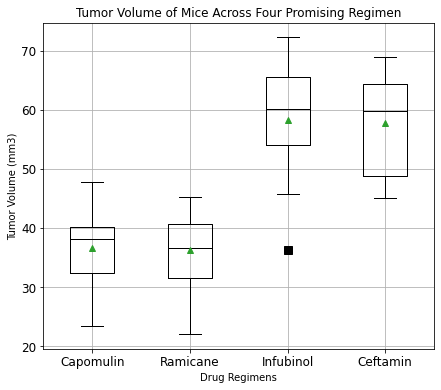

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# I am thinking I want to make a new variable and convert it to a dictionary, the link above goes that route
# and I think I favor it. 
#variables--pull from some DFs above. 
cap = capomulin_df["Tumor Volume (mm3)"]
ram = ramicane_df["Tumor Volume (mm3)"]
inf = infubinol_df["Tumor Volume (mm3)"]
cef = ceftamin_df["Tumor Volume (mm3)"]
box_df = pd.DataFrame({"Capomulin": cap, "Ramicane": ram, "Infubinol": inf, "Ceftamin": cef})
# style and change the outlier color and shape so it stands out. 
style = dict(markerfacecolor='black', markersize='8', marker = 's')
#Now make a boxplot variable calling the columns from the new DF with some other formatting:
boxplot = box_df.boxplot(['Capomulin','Ramicane','Infubinol','Ceftamin'],fontsize=12,color='black',\
                         showmeans=True, figsize = (7,6), flierprops = style)
# Set title and labels
boxplot.set_title('Tumor Volume of Mice Across Four Promising Regimen')
boxplot.set_ylabel('Tumor Volume (mm3)')
boxplot.set_xlabel('Drug Regimens')
# The boxplots match the numbers in the IQR stats above. 

## Line and Scatter Plots
1) Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

2) Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

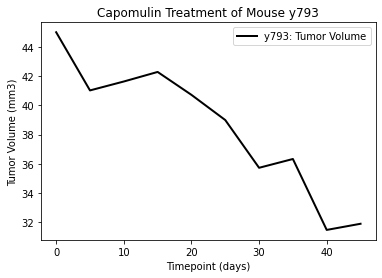

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I need to line plot this dataframe: capomulin_df --These are all the mice on Capomulin, I need to pick one
# locate a mouse I want that was treated with Capomulin
mousetumor = clean_df.loc[clean_df['Mouse ID'] == 'y793']
# y-variable
tumorvol = mousetumor["Tumor Volume (mm3)"]
# x-variable
time = mousetumor['Timepoint']
#plot the line graph and add some style/formatting. 
poormouse, =plt.plot(time, tumorvol, linewidth=2, color='black', label='y793: Tumor Volume')
#Label and legend 
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")   
plt.legend(handles=[poormouse], loc="best") 

Text(0, 0.5, 'Average Tumor Volume (mm3)')

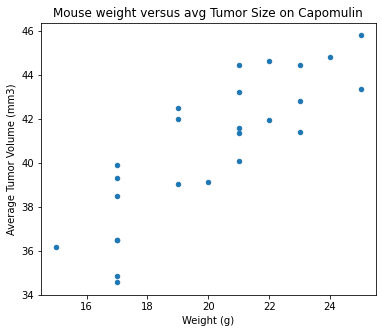

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Variables/Columns = Weight and Average Tumor Size  
# Locate all capomulins from my clean DF, then find the mean of the tumor volume along with weight. 
fullcapo = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
# going to do another .agg. The weight should not matter since they remained the same over timepoints.
weightvstumor = fullcapo.groupby("Mouse ID").agg({'Tumor Volume (mm3)': ['mean'], 'Weight (g)':['mean']})
# Plot
weightvstumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(6,5),
              title="Mouse weight versus avg Tumor Size on Capomulin")
# label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression
1) Calculate the correlation coefficient and linear regression model 
for mouse weight and average tumor volume for the Capomulin regimen

The correlation coefficient between weight and tumor volume is: 0.84
The slope and intercept are: 0.95 , 21.55


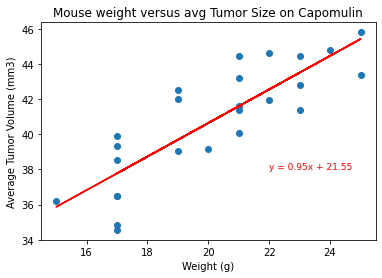

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# This will be similar to Day 3 instructor review on regression and correlation. 
#Establish my x and y values
x_values = weightvstumor['Weight (g)']
y_values = weightvstumor['Tumor Volume (mm3)']
# I had to call the columsn from the x and y values since it was also wanting to pull in the mouse ID 
# and then cause too many arguments. 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values['mean'],y_values['mean'])
regress_values = x_values * slope + intercept
#create the line equation for slope, this will need to be displayed with my line in the plot. 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot and format
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(22,38), fontsize=9,color="red")
#label
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse weight versus avg Tumor Size on Capomulin")
xlim=(0,50)
ylim=(30,50)
#print my correlation coefficient. I am also including what my slope and intercept are, this is also in the plot. 
print(f'The correlation coefficient between weight and tumor volume is: {round((rvalue),2)}')
print(f'The slope and intercept are: {round((slope),2)} , {round((intercept),2)}')